In [19]:
from copy import copy, deepcopy
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import linear_model
import sklearn.linear_model
import pandas as pd 
import numpy as np
import sys
import re
%matplotlib inline

In [20]:
# Load the Wine Dataset
df_wine = pd.read_csv("data/data_transformed.csv", encoding = 'utf8', index_col=0)
# df_wine = pd.read_csv("../data/winemag-data-130k-v2.csv", encoding = 'utf8', index_col=0)
df_wine = df_wine.reset_index()

In [21]:
df_wine.head(3)

,index,price,points,year_of_wine,v_Abouriou,v_Aglianico,v_Airen,v_Albana,v_Albanello,v_Albariño,...,province_Spanish Islands,province_Tasmania,province_Texas,province_Tuscany,province_Veneto,province_Vermont,province_Victoria,province_Virginia,province_Washington,province_Western Australia
0,2,14.0,87,2012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,13.0,87,2011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,65.0,87,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preparation

In [22]:
# DEFINE X and Y VARIABLES
df_X = df_wine.drop('points', axis=1)
df_Y = df_wine[['points']]
print(df_X.shape)
print(df_Y.shape)

(76176, 584)
(76176, 1)


In [23]:
# Split Data to Test and Traning
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33)

<h4>Outlier Analysis</h4>


In [52]:
before = y_test.shape[0]
print("Test before outliers: ", before)

def check_outliers(data, m=2):
    clean_data = data[abs(data - np.mean(data)) < m * np.std(data)]
    return clean_data.shape[0]

after = check_outliers(y_test.values)
print("Test after outliers: ", after)

diff = before-after
percent = round((diff * 100)/before, 2)
print("Total: {} out of {} ({}%).".format(diff, before, percent))


Test before outliers:  25139
Test after outliers:  24125
Total: 1014 out of 25139 (4.03%).


In [53]:
before = y_train.shape[0]
print("Training before outliers: ", before)

def check_outliers(data, m=2):
    clean_data = data[abs(data - np.mean(data)) < m * np.std(data)]
    return clean_data.shape[0]

after = check_outliers(y_train.values)
print("Training after outliers: ", after)

diff = before-after
percent = round((diff * 100)/before, 2)
print("Total: {} out of {} ({}%).".format(diff, before, percent))

Training before outliers:  51037
Training after outliers:  48977
Total: 2060 out of 51037 (4.04%).


/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


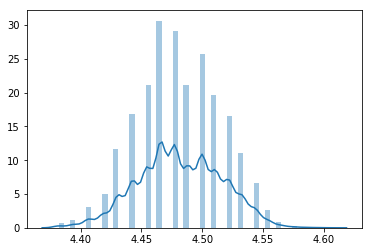

In [42]:
import seaborn as sns

sns.distplot(np.log(y_test))

/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


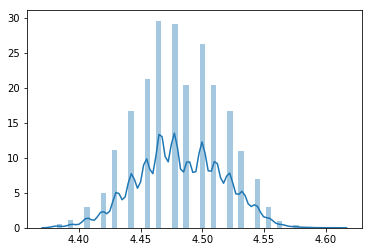

In [43]:
sns.distplot(np.log(y_train))

# Outliers in Test Data

### Regression WITH outliers in Training data

In [24]:
# test sets also have outliers
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions_3 = lm.predict(X_test)

/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [25]:
from copy import copy, deepcopy
# store results
ax3_y_test = deepcopy(y_test)
ax3_y_predictions = deepcopy(y_predictions_3)

In [26]:
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax3_y_test, ax3_y_predictions)))
print('MAE:', metrics.mean_absolute_error(ax3_y_test, ax3_y_predictions))
rmse_3 = np.sqrt(metrics.mean_squared_error(ax3_y_test, ax3_y_predictions))
mae_3 = metrics.mean_absolute_error(ax3_y_test, ax3_y_predictions)

RMSE: 2.6683909939816983
MAE: 2.08861881116699


### Regression W/O outliers in Training Data


In [27]:
# Clean test data
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# store clean training data
X_train_clean = deepcopy(X_train)
y_train_clean = deepcopy(y_train)

# remove outliers from training data
print("Training data with outliers", X_train_clean.shape, y_train_clean.shape)

training_prices_wo_outliers = reject_outliers(X_train_clean['price'].values)
# remove points from test set if price was an outlier
min_price = min(training_prices_wo_outliers)
max_price = max(training_prices_wo_outliers)


training_data = pd.concat([X_train_clean, y_train_clean], axis=1)
training_clean = training_data.drop(training_data[training_data.price < min_price].index)
training_clean = training_clean.drop(training_clean[training_clean.price > max_price].index)

X_train_outlier_clean = training_clean[training_clean.columns[:-1].tolist()]
y_train_outlier_clean = training_clean['points'].values.reshape(-1, 1)
print("Training data without outliers", X_train_outlier_clean.shape, y_train_outlier_clean.shape)

Training data with outliers (51037, 584) (51037, 1)
Training data without outliers (49797, 584) (49797, 1)


In [28]:
# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train_outlier_clean, y_train_outlier_clean)
y_predictions_4 = lm.predict(X_test)

In [29]:
from copy import copy, deepcopy
# store results for chart 4
ax4_y_test = deepcopy(y_test)
ax4_y_predictions = deepcopy(y_predictions_4)

In [30]:
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ax4_y_predictions)))
print('MAE:', metrics.mean_absolute_error(y_test, ax4_y_predictions))
rmse_4 = np.sqrt(metrics.mean_squared_error(y_test, ax4_y_predictions))
mae_4 = metrics.mean_absolute_error(y_test, ax4_y_predictions)

RMSE: 3.572513497646347
MAE: 2.071421681594664


### Clean outliers from Test Data

In [31]:
# store clean test data
X_test_clean = deepcopy(X_test)
y_test_clean = deepcopy(y_test)

In [32]:
############################# REMOVE OUTLIERS FROM TESTING ##########################
print("Test data with outliers", X_test_clean.shape, y_test_clean.shape)
# clean prices from testing
test_prices_wo_outliers = reject_outliers(X_test_clean.values)
# remove points from test set if price was an outlier
min_price = min(test_prices_wo_outliers)
max_price = max(test_prices_wo_outliers)

test_data = pd.concat([X_test, y_test], axis=1)
test_data_clean = test_data.drop(test_data[test_data.price < min_price].index)
test_data_clean = test_data_clean.drop(test_data_clean[test_data_clean.price > max_price].index)

X_test_outlier_clean = test_data_clean[test_data_clean.columns[:-1].tolist()]
y_test_outlier_clean = pd.DataFrame(test_data_clean['points'])
print("Test data without outliers", X_test_outlier_clean.shape, y_test_outlier_clean.shape)
#######################################################################################

Test data with outliers (25139, 584) (25139, 1)
Test data without outliers (25139, 584) (25139, 1)


### Regression WITH outliers in Training data


In [33]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train) # dirty training
y_predictions_1 = lm.predict(X_test_outlier_clean) # clean test

In [34]:
from copy import copy, deepcopy
# store results
ax1_y_test = deepcopy(y_test_outlier_clean)
ax1_y_predictions = deepcopy(y_predictions_1)

In [35]:
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax1_y_test, ax1_y_predictions)))
print('MAE:', metrics.mean_absolute_error(ax1_y_test, ax1_y_predictions))
rmse_1 = np.sqrt(metrics.mean_squared_error(ax1_y_test, ax1_y_predictions))
mae_1 = metrics.mean_absolute_error(ax1_y_test, ax1_y_predictions)

RMSE: 2.6683909939816983
MAE: 2.08861881116699


### Regression W/O outliers in Training data

In [36]:
# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train_outlier_clean, y_train_outlier_clean)
y_predictions_2 = lm.predict(X_test_outlier_clean)

In [37]:
from copy import copy, deepcopy
# store results
ax2_y_test = deepcopy(y_test_outlier_clean)
ax2_y_predictions = deepcopy(y_predictions_2)

In [38]:
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ax2_y_test, y_predictions_2)))
print('MAE:', metrics.mean_absolute_error(ax2_y_test, y_predictions_2))
rmse_2 = np.sqrt(metrics.mean_squared_error(ax2_y_test, y_predictions_2))
mae_2 = metrics.mean_absolute_error(ax2_y_test, y_predictions_2)

RMSE: 3.572513497646347
MAE: 2.071421681594664


# SUMMARY

In [39]:
from IPython.display import HTML, display

data = [["Training\Test", "W/ OUTLIERS","W/O OUTLIERS"],
         ["W/ OUTLIERS",mae_3, mae_1],
         ["W/O OUTLIERS",mae_4, mae_2],
         ]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Training\Test,W/ OUTLIERS,W/O OUTLIERS
W/ OUTLIERS,2.08861881116699,2.08861881116699
W/O OUTLIERS,2.071421681594664,2.071421681594664


In [40]:
from IPython.display import HTML, display

data = [["Training\Test", "W/ OUTLIERS","W/O OUTLIERS"],
         ["W/ OUTLIERS",rmse_3, rmse_1],
         ["W/O OUTLIERS",rmse_4, rmse_2],
         ]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

Training\Test,W/ OUTLIERS,W/O OUTLIERS
W/ OUTLIERS,2.6683909939816983,2.6683909939816983
W/O OUTLIERS,3.572513497646347,3.572513497646347


************OUTLIERS IN TEST DATA **************
--> TEST OUTLIERS AND TRAINING OUTLIERS
max_y_predictions:  177
min_y_predictions:  81
MAE: 2.08861881116699

--> ONLY OUTLIERS IN TEST
max_y_predictions:  350
min_y_predictions:  80
MAE: 2.071421681594664

************CLEAN TEST DATA**************
--> ONLY OUTLIERS IN TRAINING:
max_y_predictions:  177
min_y_predictions:  81
MAE: 2.08861881116699

--> NO OUTLIERS:
max_y_predictions:  350
min_y_predictions:  80
MAE: 2.071421681594664


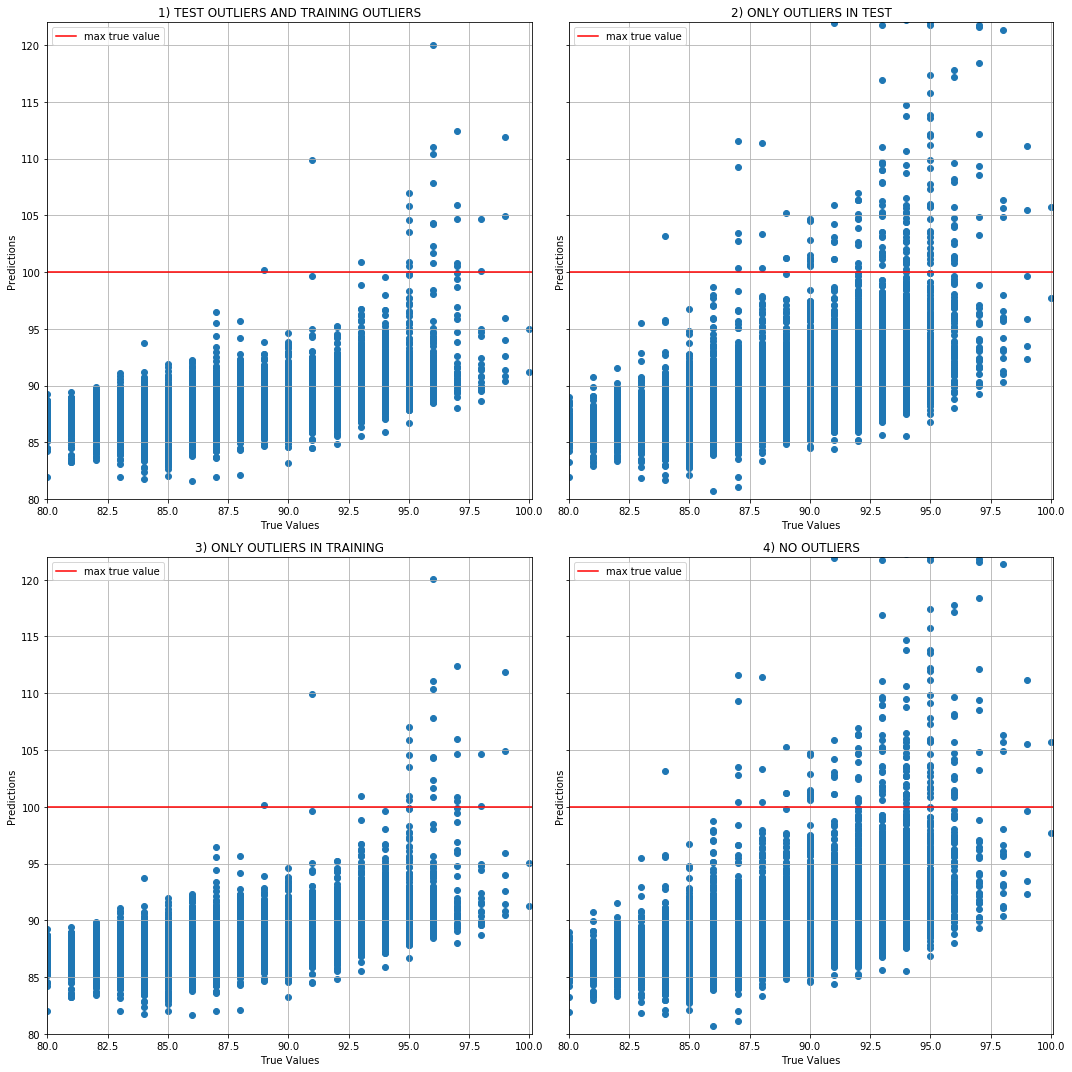

In [41]:
f, ((ax3, ax4), (ax1, ax2)) = plt.subplots(2, 2, sharey=True, figsize=(15,15))

# Dirty test outliers
print("************OUTLIERS IN TEST DATA **************")
# plot w/ outliers in training data
ax3.scatter(ax3_y_test, ax3_y_predictions)
ax3.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax3_y_predictions))
min_y_predictions = int(min(ax3_y_predictions))

print("--> TEST OUTLIERS AND TRAINING OUTLIERS")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_3)
print()

max_y_true = int(max(ax3_y_test.points))
min_y_true = int(min(ax3_y_test.points))

ax3.axhline(max_y_true,label='max true value', color="red")

ax3.legend()
ax3.grid()
ax3.set_xlim([80,100+0.1])
ax3.set_ylim([80,120+2])
ax3.set_title('1) TEST OUTLIERS AND TRAINING OUTLIERS')

# plot w/o outliers in training data
ax4.scatter(ax4_y_test, ax4_y_predictions)
ax4.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax4_y_predictions))
min_y_predictions = int(min(ax4_y_predictions))

print("--> ONLY OUTLIERS IN TEST")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_4)

max_y_true = int(max(ax4_y_test.points))
min_y_true = int(min(ax4_y_test.points))

ax4.axhline(max_y_true,label='max true value', color="red")

ax4.legend()
ax4.grid()
ax4.set_xlim([80,100+0.1])
ax4.set_ylim([80,120+2])
ax4.set_title('2) ONLY OUTLIERS IN TEST')

print()

# Clean test
print("************CLEAN TEST DATA**************")
# plot w/ outliers in training data
ax1.scatter(ax1_y_test, ax1_y_predictions)
ax1.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax1_y_predictions))
min_y_predictions = int(min(ax1_y_predictions))

print("--> ONLY OUTLIERS IN TRAINING:")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_1)
print()

max_y_true = int(max(ax1_y_test.points))
min_y_true = int(min(ax1_y_test.points))

ax1.axhline(max_y_true,label='max true value', color="red")

ax1.legend()
ax1.grid()
ax1.set_xlim([80,100+0.1])
ax1.set_ylim([80,120+2])
ax1.set_title('3) ONLY OUTLIERS IN TRAINING')

# plot w/o outliers in training data
ax2.scatter(ax2_y_test, ax2_y_predictions)
ax2.set(xlabel='True Values', ylabel='Predictions')

max_y_predictions = int(max(ax2_y_predictions))
min_y_predictions = int(min(ax2_y_predictions))

print("--> NO OUTLIERS:")
print('max_y_predictions: ', max_y_predictions)
print('min_y_predictions: ', min_y_predictions)
print('MAE:', mae_2)

max_y_true = int(max(ax2_y_test.points))
min_y_true = int(min(ax2_y_test.points))

ax2.axhline(max_y_true,label='max true value', color="red")

ax2.legend()
ax2.grid()
ax2.set_xlim([80,100+0.1])
ax2.set_ylim([80,120+2])
ax2.set_title('4) NO OUTLIERS')

plt.tight_layout()